# DATA 3550_Fall 2023-Midterm Project 

* Submission Deadline: Saturday, 10/28/2023 at 5 pm.

# DATA 3550_Fall2023-Midterm Project   Submission Guidelines

## Scenario

Imagine that you are part of a data science team hired by ABC Housing LLC in Murfreesboro, specializing in buying and selling houses. Your role is to develop an accurate prediction model for the "Saleprice" of houses. Collaborating with your team, you'll need to convey your findings to a manager who lacks familiarity with statistics and data science. The ultimate aim of your project report is to provide insights that will guide the company's real estate decisions. Additionally, the company is interested in identifying the top five crucial factors influencing house prices. Concluding the project, your team will deliver a concise presentation highlighting your discoveries.

## Jupyter Notebook Formatting Guidelines

It is very important that your Jupyter Notebook is formatted correctly with markdown, comments, and code that works. You may lose lot of points if the formatting guidelines is not followed and the results are not adequately explained.
Please do the following for each section

* Include a title as a Heading 2
* Include a brief summary of the section
* Include your code and make sure it is executable and correct, include comments with the code.
* At the end of the section, include a brief summary of the results.

## Power Point Presentation Formatting Guidelines

Your PowerPoint presentation should encompass the outlined sections, each corresponding to the respective guideline sections. The presentation structure should follow:

1. **Exploratory Data Analysis (Section 2)**
2. **Feature Engineering (Section 3)**
3. **Data Imputation (Section 4)**
4. **Train/Test Split and Scaling (Section 5)**
5. **Multiple Regression (Section 6)**
6. **LASSO Regression (Section 7)**
7. **Ridge Regression (Section 8)**
8. **Kernel Ridge Regression (Section 9)**
9. **Model Comparison (Section 10)**
10. **Conclusion (Section 10)**

Each section should be clear, concise, and visually engaging. Ensure that your presentation effectively communicates the key points, methods used, results obtained, and any insights or conclusions drawn. Feel free to incorporate relevant graphs, charts, and examples to enhance the clarity of your content.

**Note: The total number of slides should be between 13 - 15 including the title slide**


## How to turn it in:

** You will turn in the notebook file and also upload a presentation slides**

*  Your Jupyter notebook file must be named Data3550MidPro_LastnameFirstInitial.ipynb. For example: the file name will be Data3550MidPro_RimalR.ipynb if I submit the Midterm Project.
* You are to turn in your Jupyter notebook file only. No data files and no folders.
* It is assumed that you created your Jupyter notebook in a folder named Data3550MidPro_student and in that folder is a Dataset folder. It is expected the path for importing a file is looking for a data folder, for example ‘Dataset/DF_AH.csv’.
* Additionally, for the presentation, save it as a PowerPoint file with the name: Data3550MidPro_GroupName.ppt. For instance, if your group name is LASSO, the file should be named Data3550MidPro_LASSO.ppt.

** Please make sure to adhere to these guidelines when submitting your materials for the Midterm Project**

## 1. Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler as sc
from numpy import arange

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',200)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_36572\1329318337.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above
C:\Users\Katabatic\AppData\Local\Temp\ipykernel_36572\1329318337.py:27: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


These are most of the required packages and libraries required for this project. 


## 2. Import  the dataset DF_AH.csv and  Exploratory Data Analysis(15 points)
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliars, and doing some feature engineering. This dataset contains 92 variables including the target variable.
* Do the exploratory data analysis to gain better insights on the data

In [2]:
# import the data set and assign to variable
df_AH = pd.read_csv(r"C:\Users\Katabatic\Desktop\DATA 3550\Midterm\DF_AH.csv", index_col = 0, header = 0)

In [3]:
# see how many rows, columns, missing values in columns, and data types.
df_AH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 526301100 to 924151050
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overall Qual     2925 non-null   int64  
 17  O

In [4]:
# see basic statistics on numerical features
print(df_AH.describe())

       MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2925.000000   2925.000000    2925.000000   2925.000000   2925.000000   
mean     57.410256     57.471453   10115.260171      6.090256      5.563077   
std      42.663172     33.093889    7801.349001      1.404285      1.111993   
min      20.000000      0.000000    1300.000000      1.000000      1.000000   
25%      20.000000     43.000000    7440.000000      5.000000      5.000000   
50%      50.000000     63.000000    9430.000000      6.000000      5.000000   
75%      70.000000     78.000000   11520.000000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2925.000000     2925.000000   2902.000000   2925.000000   2925.000000   
mean   1971.323761     1984.254017    100.973122    438.720342     49.790427   
std      30.246052       20.856787    176.451831

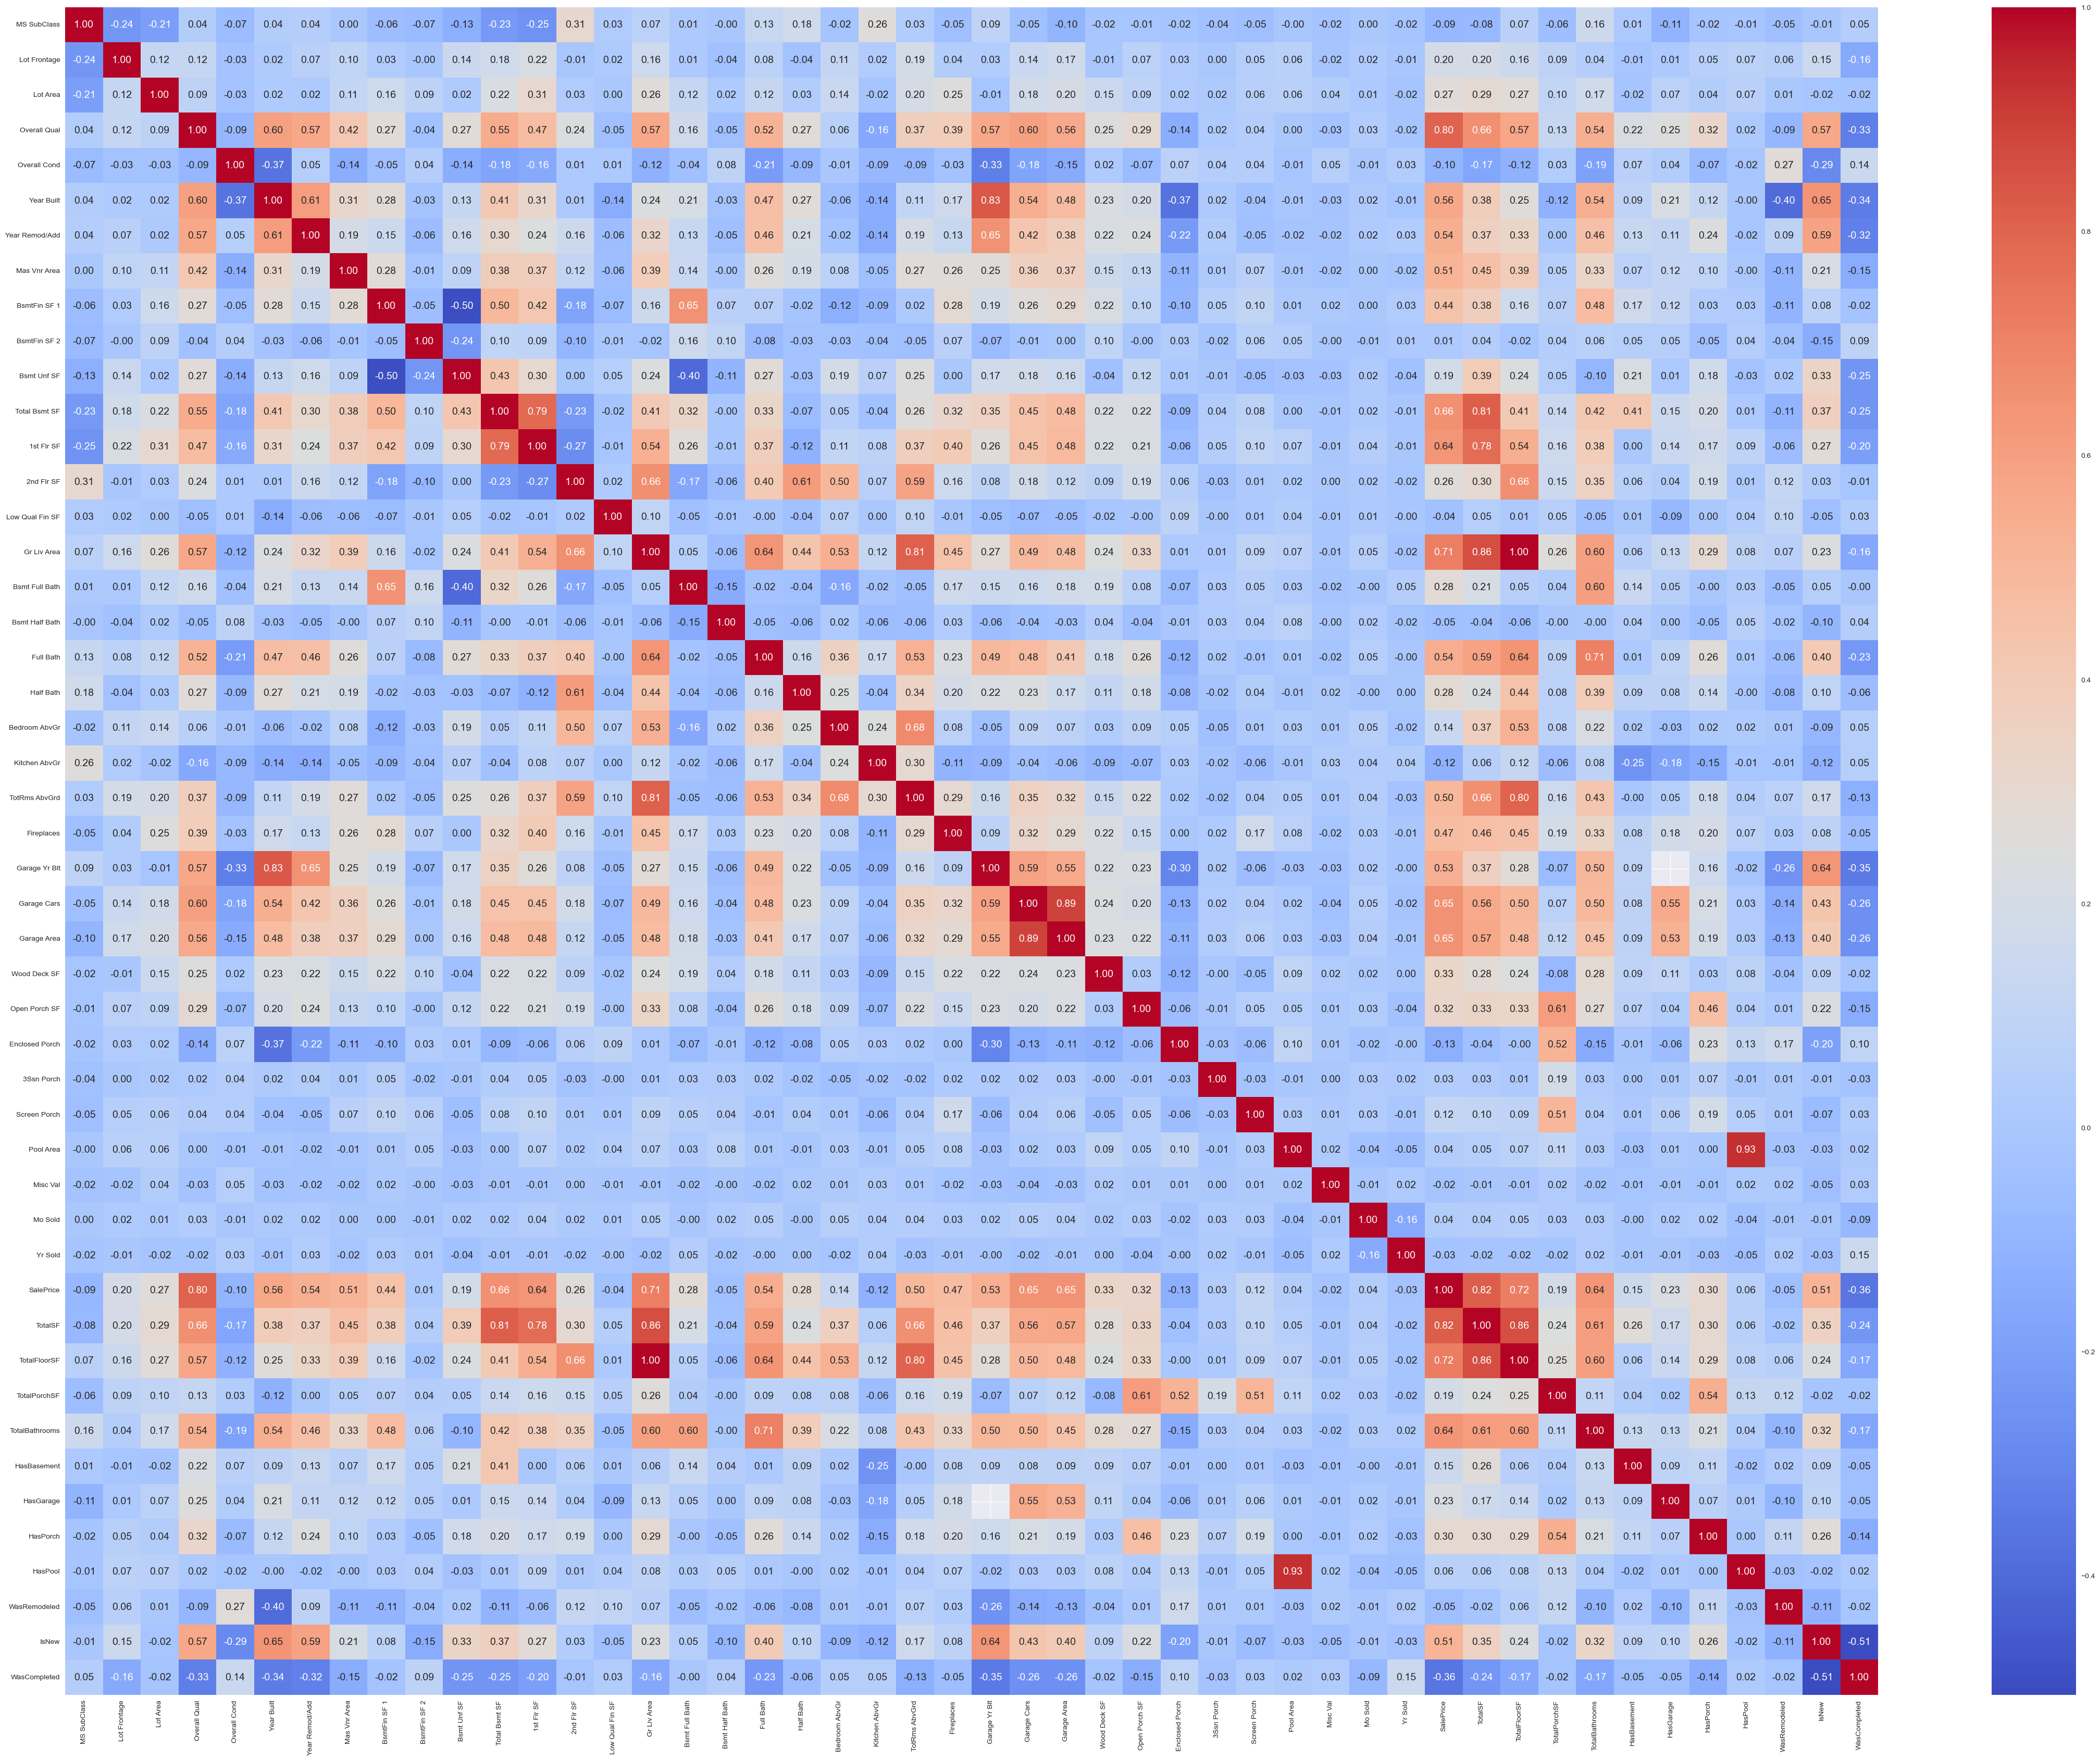

In [5]:
# get a visual on the correlation matirx to see what relates with what
correlation_matrix = df_AH.corr()
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

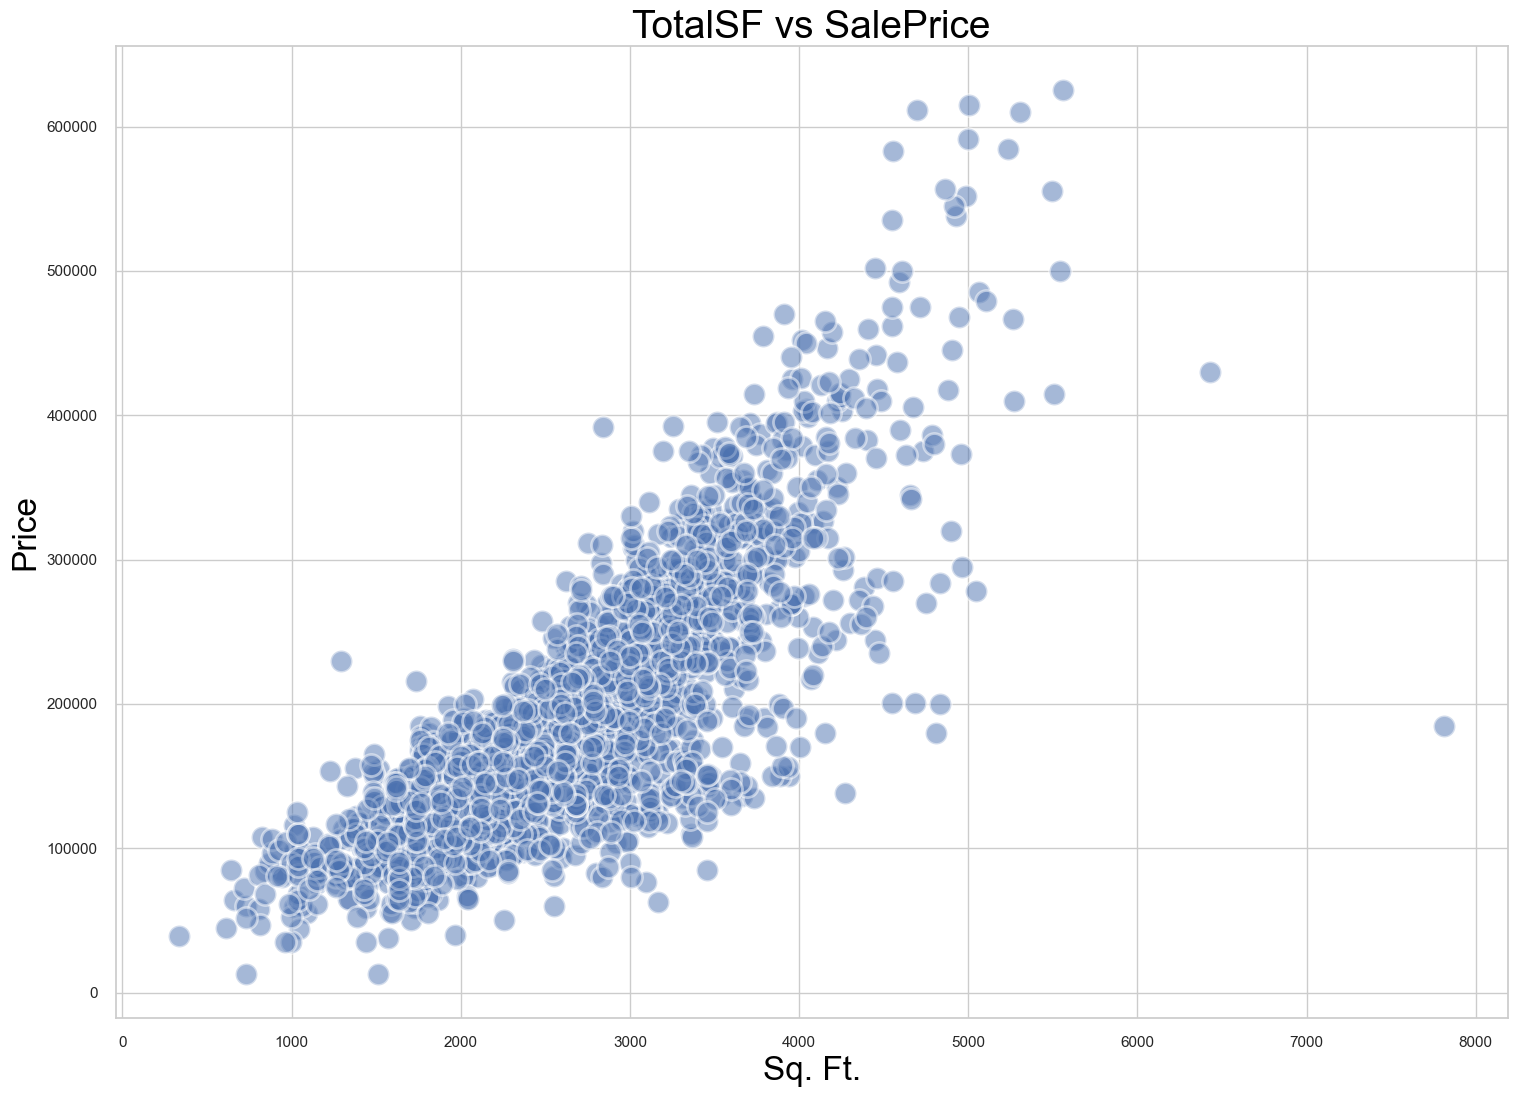

In [6]:
# TotalSF and OverallQual have the highest correlation with SalePrice so lets visualize them
sns.set(style='whitegrid')
plt.figure(figsize=(16,12)) #changes area of scatterplot
sns.scatterplot(x=df_AH['TotalSF'], y=df_AH['SalePrice'], alpha=0.5, s = 250, edgecolor='white', linewidth=2)
plt.title('TotalSF vs SalePrice', color = 'black', fontsize='28')
plt.xlabel('Sq. Ft.', color = 'black', fontsize='24')
plt.ylabel('Price', color = 'black', fontsize='24')
plt.show()

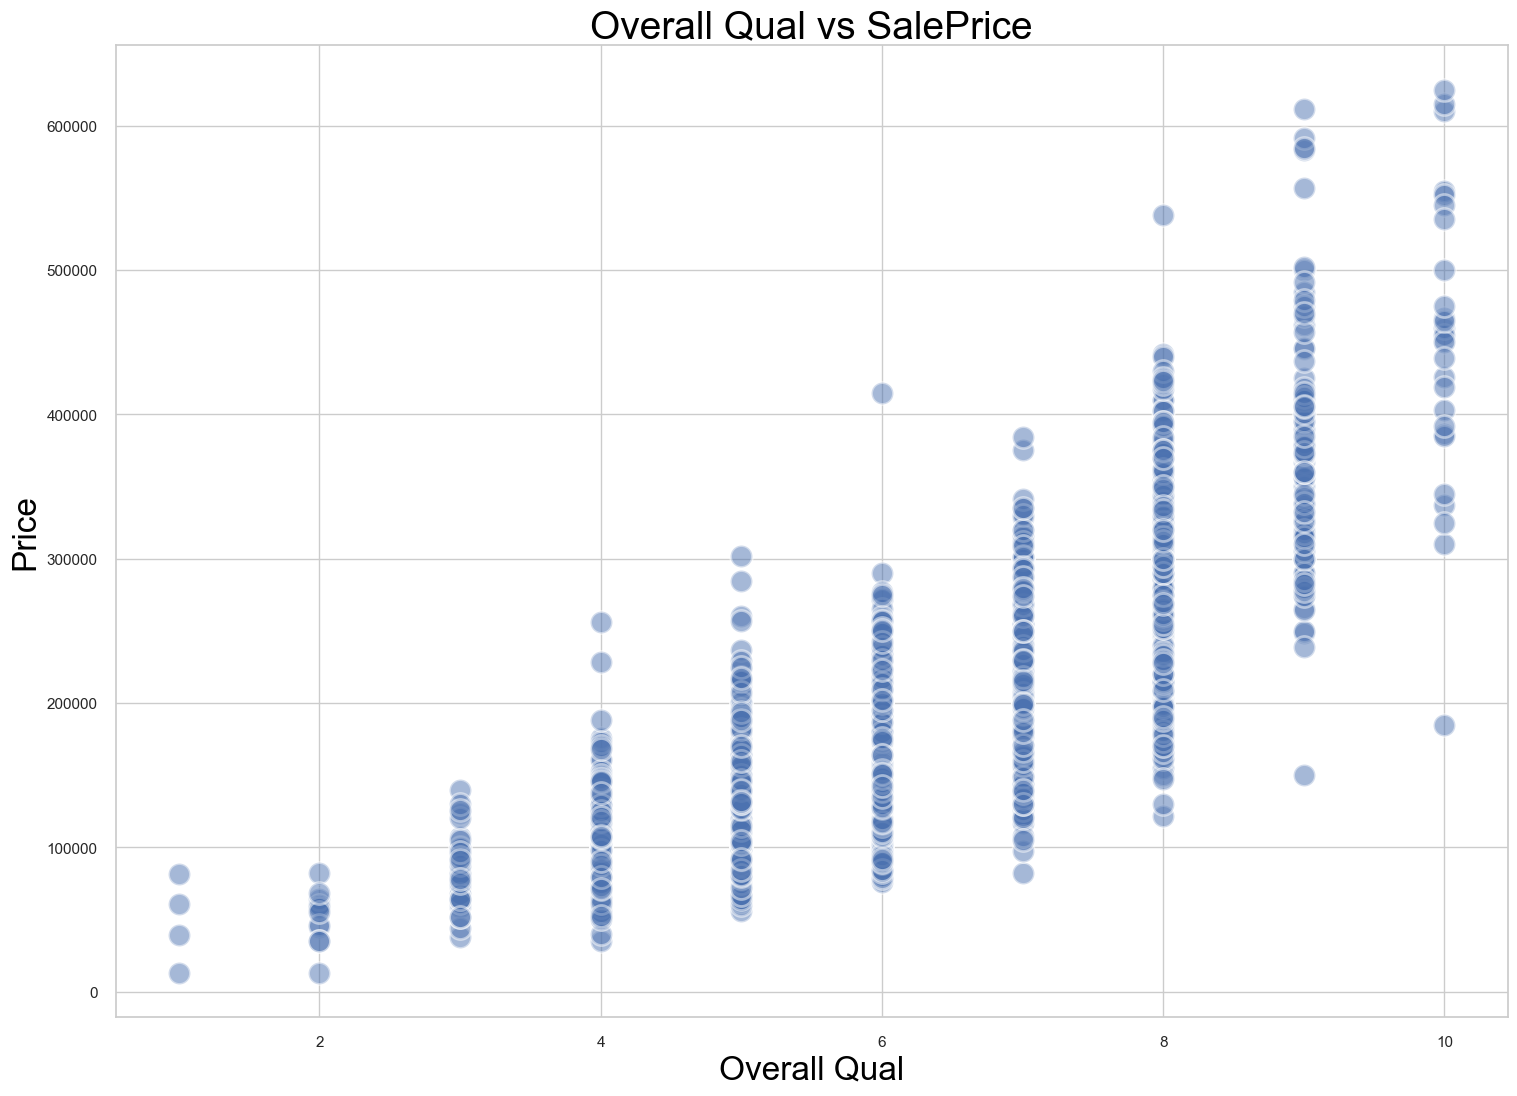

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,12)) #changes area of scatterplot
sns.scatterplot(x=df_AH['Overall Qual'], y=df_AH['SalePrice'], alpha=0.5, s = 250, edgecolor='white', linewidth=2)
plt.title('Overall Qual vs SalePrice', color = 'black', fontsize='28')
plt.xlabel('Overall Qual', color = 'black', fontsize='24')
plt.ylabel('Price', color = 'black', fontsize='24')
plt.show()

In [8]:
#lets see how the predictors correlate with eachother. this will show if there is multicollinearity problems ahead. 
corr_matrix = df_AH.drop("SalePrice", axis=1).corr().abs()
Pairwise_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                  .astype(bool))
                  .stack()
                  .sort_values(ascending=False))

Pairwise_corr.head(10)

Gr Liv Area    TotalFloorSF     0.995511
Pool Area      HasPool          0.934989
Garage Cars    Garage Area      0.892134
Gr Liv Area    TotalSF          0.863730
TotalSF        TotalFloorSF     0.863239
Year Built     Garage Yr Blt    0.834575
Total Bsmt SF  TotalSF          0.811986
Gr Liv Area    TotRms AbvGrd    0.808474
TotRms AbvGrd  TotalFloorSF     0.802774
Total Bsmt SF  1st Flr SF       0.785862
dtype: float64

As we can see, there are a ton of variables that we have at our disposal to predict the sales price of a house based upon this data set. We do have quite a few missing values in our data set which we will need to handle. There is also a high chance of multicolinearity since so many of the predictors are easily relatable. 

## 3. Perform additional Feature Engineering(10 points)

1) Identify the unique number of foundation types

In [9]:
# prints out the unique types of foundations
unique_foundation_types = df_AH['Foundation'].unique()
print("Unique Foundation Types:", unique_foundation_types)

Unique Foundation Types: ['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']


There are six types of foundations in this data set. 

2) Create the dummy variable for the foundation type

In [10]:
# creates the dummy variables and prints the first five rows so we know the dummy variables were created. 
df_AH = pd.get_dummies(df_AH, columns=['Foundation'], prefix='Foundation')
print(df_AH.head())

           MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
PID                                                                     
526301100           20        RL         141.0     31770   Pave   NaN   
526350040           20        RH          80.0     11622   Pave   NaN   
526351010           20        RL          81.0     14267   Pave   NaN   
526353030           20        RL          93.0     11160   Pave   NaN   
527105010           60        RL          74.0     13830   Pave   NaN   

          Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
PID                                                                             
526301100       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
526350040       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
526351010       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
526353030       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
52

As seen at the bottom of the print out, there are the six dummy variables for the foundation predictor. 

3) Identify the all the unique neighbourhood

In [11]:
# prints out the unique neighborhoods (ie the names of the different neighborhoods)
unique_neighborhood = df_AH['Neighborhood'].unique()
print("Unique Neighborhoods:", unique_neighborhood)

Unique Neighborhoods: ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


There are 28 different neighborhoods. 

4) Create the dummy variable for the neighbourhood

In [12]:
# creates the dummy variables and prints the first five rows so we know the dummy variables were created. 
df_AH = pd.get_dummies(df_AH, columns=['Neighborhood'], prefix='Neighborhood', prefix_sep='_')
print(df_AH.head())

           MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
PID                                                                     
526301100           20        RL         141.0     31770   Pave   NaN   
526350040           20        RH          80.0     11622   Pave   NaN   
526351010           20        RL          81.0     14267   Pave   NaN   
526353030           20        RL          93.0     11160   Pave   NaN   
527105010           60        RL          74.0     13830   Pave   NaN   

          Lot Shape Land Contour Utilities Lot Config Land Slope Condition 1  \
PID                                                                            
526301100       IR1          Lvl    AllPub     Corner        Gtl        Norm   
526350040       Reg          Lvl    AllPub     Inside        Gtl       Feedr   
526351010       IR1          Lvl    AllPub     Corner        Gtl        Norm   
526353030       Reg          Lvl    AllPub     Corner        Gtl        Norm   
52710501

5) Look at the DF_AH.info() and drop all the variables that have Non-Null count less than 2500.

In [13]:
print(df_AH.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 526301100 to 924151050
Columns: 123 entries, MS SubClass to Neighborhood_Veenker
dtypes: float64(13), int64(35), object(41), uint8(34)
memory usage: 2.1+ MB
None


In [14]:
# this will drop all columns that have less than 2500 rows with values in them.
# from the print out we can see that we went from 123 predictors to 119. 
df_AH = df_AH.dropna(thresh=2500, axis=1)
print(df_AH.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 526301100 to 924151050
Columns: 119 entries, MS SubClass to Neighborhood_Veenker
dtypes: float64(13), int64(35), object(37), uint8(34)
memory usage: 2.0+ MB
None


## 4.  Impute the data (10 points)

1) Check whether each of the variables have missing values

2) Impute the missing values using appropriate method and explain why you use that method?

3) Look at the data and for remaining categorical variable, create the dummy variable, or drop the variable. Explain your reasoning.


In [15]:
# this will print out the columns with missing data
# most of these make sense, like basement and garage because some homes do not have these
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          79
Bsmt Cond          79
Bsmt Exposure      82
BsmtFin Type 1     79
BsmtFin Type 2     80
Electrical          1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
TotalBathrooms      1
dtype: int64


In [16]:
# The row that was missing bsmt full bath and bsmnt half bath, we made both of those entries zero because that house doesn't have a basement and therefore doesn't have bathrooms in the basement.
df_AH.loc[df_AH['Bsmt Qual'].isna(), ['Bsmt Full Bath', 'Bsmt Half Bath']] = 0


In [17]:
# verify that the two above have no missing values now and see what else to fix
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          79
Bsmt Cond          79
Bsmt Exposure      82
BsmtFin Type 1     79
BsmtFin Type 2     80
Electrical          1
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
TotalBathrooms      1
dtype: int64


In [18]:
# the one row missing totalbathrooms has 3 full and 1 half so we need to input the value of 3.5 there
df_AH.loc[df_AH['TotalBathrooms'].isna(), ['TotalBathrooms']] = 3.5

In [19]:
# verify that the one above has no missing value now and see what else to fix
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          79
Bsmt Cond          79
Bsmt Exposure      82
BsmtFin Type 1     79
BsmtFin Type 2     80
Electrical          1
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64


In [20]:
# we have 159 garage rows that need to be fixed, but garage type has only 157. This is becuase "detchd" is in garage type but none of the other characteristics of a garage are there, so more than lkely they do not have garages
# this will remove the incorrectly placed "detchd" and all the garage attributes will now have 159 missing values
# Identify rows where "Garage Finish" is blank and "Garage Type" is "Detchd," and set "Garage Type" to blank
df_AH.loc[(df_AH['Garage Finish'].isna()) & (df_AH['Garage Type'] == 'Detchd'), 'Garage Type'] = np.nan

In [21]:
# verify that Garage Type now has 159 missing values like the rest of garage attributes
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          79
Bsmt Cond          79
Bsmt Exposure      82
BsmtFin Type 1     79
BsmtFin Type 2     80
Electrical          1
Garage Type       159
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64


In [22]:
# garage qual,garage cond,  are just houses with no garages but the attribute domain is too limited. We will insert "NA" in those blank spots to represent souses without garages
df_AH.loc[df_AH['Garage Type'].isna(), ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = "NA"

In [23]:
# verify that all garage attributes that wew fixed are not missing values
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Qual         79
Bsmt Cond         79
Bsmt Exposure     82
BsmtFin Type 1    79
BsmtFin Type 2    80
Electrical         1
Garage Cars        1
Garage Area        1
dtype: int64


In [24]:
# Garage Cars and Garage Area is one row that doesn't have any other attributes filled in except garage type "detchd" which we said is most likely a house without a garage. 
# We will input the value of zero for both
df_AH.loc[df_AH['Garage Cars'].isna(), ['Garage Cars','Garage Area']] = 0

In [25]:
# All garage attributes should no be missing any values now
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Qual         79
Bsmt Cond         79
Bsmt Exposure     82
BsmtFin Type 1    79
BsmtFin Type 2    80
Electrical         1
dtype: int64


In [26]:
# If all the basement attributes are missing for a row, then it more than likely doesn't have a basement so we will add the appropirate values to display that. 
condition = df_AH['Bsmt Qual'].isna() & df_AH['Bsmt Cond'].isna() & df_AH['Bsmt Exposure'].isna() & df_AH['BsmtFin Type 1'].isna() & df_AH['BsmtFin Type 2'].isna()
df_AH.loc[condition, ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = 'NA'

In [27]:
# Checking to see what else to fix
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Exposure      3
BsmtFin Type 2     1
Electrical         1
dtype: int64


In [28]:
# The row that is missing BsmtFin Type 2 has a value in BsmnFinSF 2 which means it has a square footage but we dont know the type.
# We have many other data points and we don't want to just guess what type of finish it is, so we chose to remove that row
df_AH = df_AH.drop(df_AH[(df_AH['BsmtFin Type 2'].isna()) & (df_AH['BsmtFin SF 2'].notna())].index)

In [29]:
# Checking to see what else to fix
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type     23
Mas Vnr Area     23
Bsmt Exposure     3
Electrical        1
dtype: int64


In [30]:
# We want to keep the 3 rows that are missing basement exposure. We decided to find out what is the most common exposure and put that value in the missing spots. 
most_common_exposure = df_AH['Bsmt Exposure'].mode().iloc[0]
#print(most_common_exposure)

# Fill missing "Bsmt Exposure" values with the most common value
df_AH.loc[df_AH['Bsmt Exposure'].isna(), ['Bsmt Exposure']] = most_common_exposure

In [31]:
# Checking to see what else to fix
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Mas Vnr Type    23
Mas Vnr Area    23
Electrical       1
dtype: int64


In [32]:
# the mas vnr type also had no area which means more than likely they do not have a mas vnr type and therefore no area.
# we will input na for mas vnr type and 0 for mas vnr area
df_AH.loc[df_AH['Mas Vnr Area'].isna(), ['Mas Vnr Area']] = 0
df_AH.loc[df_AH['Mas Vnr Type'].isna(), ['Mas Vnr Type']] = "NA"

In [33]:
# Checking to see what else to fix
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Electrical    1
dtype: int64


In [34]:
# our last column to fix is electrical with one. We decided to do the same thing we did with exposure, and find the most common value for electircal and put it there.
most_common_electrical = df_AH['Electrical'].mode().iloc[0]
#print(most_common_electrical)

# Fill missing "Electrical" values with the most common value
df_AH.loc[df_AH['Electrical'].isna(), ['Electrical']] = most_common_electrical

In [35]:
# Checking to make sure there are no more missing values
columns_with_missing_values = df_AH.columns[df_AH.isnull().sum() > 0]
print(df_AH[columns_with_missing_values].isnull().sum())

Series([], dtype: float64)


In [36]:
# double checking to make sure that we have no missing values

pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_info_rows', 200)
df_AH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 526301100 to 924151050
Data columns (total 119 columns):
 #    Column                Dtype  
---   ------                -----  
 0    MS SubClass           int64  
 1    MS Zoning             object 
 2    Lot Frontage          float64
 3    Lot Area              int64  
 4    Street                object 
 5    Lot Shape             object 
 6    Land Contour          object 
 7    Utilities             object 
 8    Lot Config            object 
 9    Land Slope            object 
 10   Condition 1           object 
 11   Condition 2           object 
 12   Bldg Type             object 
 13   House Style           object 
 14   Overall Qual          int64  
 15   Overall Cond          int64  
 16   Year Built            int64  
 17   Year Remod/Add        int64  
 18   Roof Style            object 
 19   Roof Matl             object 
 20   Exterior 1st          object 
 21   Exterior 2nd          object 
 22   Mas Vnr T

We decided to keep all of the catergorical variables. We want the best predicting model possible. Plus we want to see what LASSO will remove and ridge make near null.  

In [37]:
categorical_columns = df_AH.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
df_AH = pd.get_dummies(df_AH, columns=categorical_columns, drop_first=True)



In [38]:
pd.set_option('display.max_info_columns', 400)
pd.set_option('display.max_info_rows', 400)
df_AH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 526301100 to 924151050
Data columns (total 375 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    MS SubClass             int64  
 1    Lot Frontage            float64
 2    Lot Area                int64  
 3    Overall Qual            int64  
 4    Overall Cond            int64  
 5    Year Built              int64  
 6    Year Remod/Add          int64  
 7    Mas Vnr Area            float64
 8    BsmtFin SF 1            float64
 9    BsmtFin SF 2            float64
 10   Bsmt Unf SF             float64
 11   Total Bsmt SF           float64
 12   1st Flr SF              int64  
 13   2nd Flr SF              int64  
 14   Low Qual Fin SF         int64  
 15   Gr Liv Area             int64  
 16   Bsmt Full Bath          float64
 17   Bsmt Half Bath          float64
 18   Full Bath               int64  
 19   Half Bath               int64  
 20   Bedroom AbvGr           int64  
 21  

## 5. Create the train/test data and scaling (5 points)

1) Split the data into training and test set with training on 80 percent. You may use the following code 

* X = DF_AH.drop('SalePrice', axis = 1) #keep features only for X
* y = DF_AH['SalePrice'] #keep target variable only for y

* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X = df_AH.drop('SalePrice', axis = 1) #keep features only for X
y = df_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

2) Standardize the data using standard scaler, then you will be building the regression models suing the scaled data.

In [40]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:
# Convert the standardized data to a pandas DataFrame
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns)

# Convert the standardized data to a pandas DataFrame
X_test_sc_df = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [42]:
X_train_sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 374 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    MS SubClass             float64
 1    Lot Frontage            float64
 2    Lot Area                float64
 3    Overall Qual            float64
 4    Overall Cond            float64
 5    Year Built              float64
 6    Year Remod/Add          float64
 7    Mas Vnr Area            float64
 8    BsmtFin SF 1            float64
 9    BsmtFin SF 2            float64
 10   Bsmt Unf SF             float64
 11   Total Bsmt SF           float64
 12   1st Flr SF              float64
 13   2nd Flr SF              float64
 14   Low Qual Fin SF         float64
 15   Gr Liv Area             float64
 16   Bsmt Full Bath          float64
 17   Bsmt Half Bath          float64
 18   Full Bath               float64
 19   Half Bath               float64
 20   Bedroom AbvGr           float64
 21   Kitchen AbvG

We now have the training and testing data set. We also know that we have 374 parameters for our models to assess. 

## 6.  Build the Multiple Regression Model (10 points)

(a)  Build a multiple regression model using backwards elimination. To do this follow the following steps:

(1) Build initial model 

(2) Review p-values

    - if a p-value is > 0.05 then eliminate the highest p-value and go to step 3
    - **if all p-values are less than 0.05 then your model is complete**
    
(3) Build a new model without eliminated independent variable

(4) Go back to step 2

(b) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.


In [43]:
# If not using standardized data

# import statsmodels.api as sm
# import numpy as np

# #add the constant
# X_train = sm.add_constant(X_train)

# #fit the model
# ols_model = sm.OLS(y_train, X_train).fit()

# #set the intial variable for the while loop
# max_p_value = 0.99
# #set the count variable
# iteration = 0
# #keep a list of the excluded features so it drops all the ones we previously removed
# excluded_features = []

# #build the while loop under the condition that the max p value needs to be greater than .05 to enter the loop
# while max_p_value > 0.05:
#     p_values = ols_model.pvalues[1:]  # Exclude the constant term
#     max_p_value = p_values.max() #finds the max p value

#     if max_p_value > 0.05:
#         max_p_value_predictor = p_values.idxmax() #indexes the p value to find the predictor
#         excluded_features.append(max_p_value_predictor) #appends the predictor with the highest p value to the list
#         X_subset = X_train.drop(columns=excluded_features) #creates a new "X_train" so that we can fit a new model
#         ols_model = sm.OLS(y_train, X_subset).fit()  # Create a new model with the updated subset
#         iteration += 1 #add one to the count
#         print(f"Iteration {iteration}: Max p-value = {max_p_value}, Removed feature: {max_p_value_predictor}")

# model_summary = ols_model.summary()
# print(model_summary)


The code below was our attempt at standardizing and building the backwards stepwise regression model. It does not work currently. 

(5) As we used the validation set approach here, predict the y values in the test data and report the following measures of accuracy.

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
Please interpret these values.

In [44]:
# Add the constant
X_train_sc_df = sm.add_constant(X_train_sc_df)

# Fit the initial model
ols_model = sm.OLS(y_train, X_train_sc_df).fit()

# Set the initial variable for the while loop
max_p_value = 0.99
iteration = 0
excluded_features_sc = []

# Build the while loop under the condition that the max p-value needs to be greater than 0.05 to enter the loop
while max_p_value > 0.05:
    p_values = ols_model.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()

    if max_p_value > 0.05:
        max_p_value_predictor = p_values.idxmax()
        excluded_features_sc.append(max_p_value_predictor)
        
        # Create a new DataFrame with the remaining features and add the constant
        X_subset = X_train_sc_df.drop(columns=excluded_features_sc)
        X_subset = sm.add_constant(X_subset)

        ols_model = sm.OLS(y_train, X_subset).fit()
        iteration += 1
        print(f"Iteration {iteration}: Max p-value = {max_p_value}, Removed feature: {max_p_value_predictor}")

# Create a list of column names for the summary
#column_names = ['const'] + [col for col in X_train.columns if col not in excluded_features]

# Display the final summary
model_summary = ols_model.summary()
print(model_summary)


Iteration 1: Max p-value = 0.9991851009446966, Removed feature: Neighborhood_MeadowV
Iteration 2: Max p-value = 0.9907732429286431, Removed feature: Roof Matl_Membran
Iteration 3: Max p-value = 0.9907150523617063, Removed feature: Garage Yr Blt_1926.0
Iteration 4: Max p-value = 0.9959261174757414, Removed feature: Garage Yr Blt_1954.0
Iteration 5: Max p-value = 0.995280152963516, Removed feature: Garage Yr Blt_1983.0
Iteration 6: Max p-value = 0.988502619530244, Removed feature: Garage Yr Blt_1991.0
Iteration 7: Max p-value = 0.9864913444257014, Removed feature: Garage Yr Blt_1933.0
Iteration 8: Max p-value = 0.984134842612205, Removed feature: Exterior 1st_Stone
Iteration 9: Max p-value = 0.9887740888497399, Removed feature: Roof Matl_WdShake
Iteration 10: Max p-value = 0.976930175733755, Removed feature: Garage Yr Blt_1941.0
Iteration 11: Max p-value = 0.954394449202224, Removed feature: Garage Yr Blt_1925.0
Iteration 12: Max p-value = 0.9539514346565632, Removed feature: Garage Yr B

Iteration 101: Max p-value = 0.7624173681311006, Removed feature: BsmtFin Type 1_NA
Iteration 102: Max p-value = 0.5907301408214608, Removed feature: Lot Shape_Reg
Iteration 103: Max p-value = 0.5899334433360868, Removed feature: Heating QC_Gd
Iteration 104: Max p-value = 0.5946655830222217, Removed feature: Garage Yr Blt_1951.0
Iteration 105: Max p-value = 0.5803149950942639, Removed feature: Exterior 1st_HdBoard
Iteration 106: Max p-value = 0.573343571772658, Removed feature: Condition 1_RRNn
Iteration 107: Max p-value = 0.6050237885776841, Removed feature: Condition 1_RRAe
Iteration 108: Max p-value = 0.5851600650851134, Removed feature: Garage Yr Blt_1978.0
Iteration 109: Max p-value = 0.5792882940399002, Removed feature: BsmtFin Type 1_BLQ
Iteration 110: Max p-value = 0.5809519324987535, Removed feature: Sale Type_VWD
Iteration 111: Max p-value = 0.5696736763153102, Removed feature: Garage Yr Blt_1974.0
Iteration 112: Max p-value = 0.5700655030985546, Removed feature: Garage Yr Bl

Iteration 200: Max p-value = 0.23964800902211694, Removed feature: Garage Yr Blt_1917.0
Iteration 201: Max p-value = 0.2393712968382647, Removed feature: Neighborhood_Greens
Iteration 202: Max p-value = 0.24468078127719115, Removed feature: BsmtFin Type 1_Rec
Iteration 203: Max p-value = 0.22023942729155777, Removed feature: Bsmt Half Bath
Iteration 204: Max p-value = 0.2017642294607427, Removed feature: Garage Yr Blt_1939.0
Iteration 205: Max p-value = 0.20613863061529117, Removed feature: Functional_Sev
Iteration 206: Max p-value = 0.20792578891433297, Removed feature: Garage Yr Blt_1921.0
Iteration 207: Max p-value = 0.1994135117814942, Removed feature: Garage Yr Blt_1979.0
Iteration 208: Max p-value = 0.20309640806394477, Removed feature: Paved Drive_P
Iteration 209: Max p-value = 0.20406677738528406, Removed feature: Exter Cond_Gd
Iteration 210: Max p-value = 0.42594657122576896, Removed feature: Exter Cond_TA
Iteration 211: Max p-value = 0.20031255133977513, Removed feature: Gara

In [45]:
# Drop the same excluded features from the testing data
X_test_sc_df = X_test_sc_df.drop(columns=excluded_features_sc)
# Add the constant
X_test_sc_df = sm.add_constant(X_test_sc_df, has_constant = 'add')

In [46]:
# Make predictions
y_pred_test = ols_model.predict(X_test_sc_df)

# Calculate accuracy measures and evaluate the model's performance
rmse_linreg = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_linreg = mean_absolute_percentage_error(y_test, y_pred_test) * 100
r2_linreg = r2_score(y_test, y_pred_test)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_linreg:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_linreg:.2f}%")
print(f"R-squared (R²): {r2_linreg:.4f}")

# # Calculate accuracy measures and evaluate the model's performance
# rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_test))
# mape_linear = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
# r2_linreg = r2_score(y_test, y_pred_test)

# # Print the results
# print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape_linear:.2f}%")
# print(f"R-squared (R²): {r2_linreg:.4f}")








Root Mean Squared Error (RMSE): 29595.87
Mean Absolute Percentage Error (MAPE): 9.43%
R-squared (R²): 0.8633


In [47]:
X_test_sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 116 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    const                   float64
 1    MS SubClass             float64
 2    Lot Frontage            float64
 3    Lot Area                float64
 4    Overall Qual            float64
 5    Overall Cond            float64
 6    Year Built              float64
 7    Year Remod/Add          float64
 8    Mas Vnr Area            float64
 9    BsmtFin SF 1            float64
 10   Bsmt Unf SF             float64
 11   Total Bsmt SF           float64
 12   2nd Flr SF              float64
 13   Gr Liv Area             float64
 14   Bedroom AbvGr           float64
 15   Kitchen AbvGr           float64
 16   Fireplaces              float64
 17   Garage Cars             float64
 18   Garage Area             float64
 19   Wood Deck SF            float64
 20   Screen Porch            float64
 21   Pool Area     

In [48]:
# Get all the parameters printed out to write the regression equation 

print("Parameters: ",  ols_model.params.round(2))







Parameters:  const                     179967.42
MS SubClass                -2534.55
Lot Frontage                 983.59
Lot Area                    6992.12
Overall Qual                9674.84
Overall Cond                6813.59
Year Built                  7511.85
Year Remod/Add              1368.95
Mas Vnr Area                4510.87
BsmtFin SF 1                4319.23
Bsmt Unf SF                -4537.42
Total Bsmt SF               5805.08
2nd Flr SF                  3421.03
Gr Liv Area                16545.63
Bedroom AbvGr              -3520.73
Kitchen AbvGr              -1711.79
Fireplaces                  1640.87
Garage Cars                 2713.20
Garage Area                 2831.27
Wood Deck SF                1893.26
Screen Porch                2024.07
Pool Area                  -4202.01
Yr Sold                    -1233.02
TotalSF                    13850.77
HasPool                     5032.85
IsNew                       5198.30
WasCompleted               -2612.74
Neighborhood_Cr

In [49]:
#create a data frame of coefficient vector
coef_vec = pd.DataFrame(ols_model.params.round(2))

#reset index to use the variable names as a column
coef_vec = coef_vec.reset_index()
print(coef_vec.head())

          index          0
0         const  179967.42
1   MS SubClass   -2534.55
2  Lot Frontage     983.59
3      Lot Area    6992.12
4  Overall Qual    9674.84


In [50]:
#rename columns
coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'Backwards_coeff'})
coef.head()
# Get all the parameters printed out to write the regression equation 

print("Parameters: ",  ols_model.params.round(2))

Parameters:  const                     179967.42
MS SubClass                -2534.55
Lot Frontage                 983.59
Lot Area                    6992.12
Overall Qual                9674.84
Overall Cond                6813.59
Year Built                  7511.85
Year Remod/Add              1368.95
Mas Vnr Area                4510.87
BsmtFin SF 1                4319.23
Bsmt Unf SF                -4537.42
Total Bsmt SF               5805.08
2nd Flr SF                  3421.03
Gr Liv Area                16545.63
Bedroom AbvGr              -3520.73
Kitchen AbvGr              -1711.79
Fireplaces                  1640.87
Garage Cars                 2713.20
Garage Area                 2831.27
Wood Deck SF                1893.26
Screen Porch                2024.07
Pool Area                  -4202.01
Yr Sold                    -1233.02
TotalSF                    13850.77
HasPool                     5032.85
IsNew                       5198.30
WasCompleted               -2612.74
Neighborhood_Cr

In [51]:
#create a data frame of coefficient vector
coef_vec = pd.DataFrame(ols_model.params.round(2))

# Write Multiple regression equation
print('Forecasted Sale Price =', coef['Backwards_coeff'][0], '+')
for x in range (1, len(coef['Variable_Names'])):
    print( coef['Variable_Names'][x], " * ", coef['Backwards_coeff'][x], " + ")

Forecasted Sale Price = 179967.42 +
MS SubClass  *  -2534.55  + 
Lot Frontage  *  983.59  + 
Lot Area  *  6992.12  + 
Overall Qual  *  9674.84  + 
Overall Cond  *  6813.59  + 
Year Built  *  7511.85  + 
Year Remod/Add  *  1368.95  + 
Mas Vnr Area  *  4510.87  + 
BsmtFin SF 1  *  4319.23  + 
Bsmt Unf SF  *  -4537.42  + 
Total Bsmt SF  *  5805.08  + 
2nd Flr SF  *  3421.03  + 
Gr Liv Area  *  16545.63  + 
Bedroom AbvGr  *  -3520.73  + 
Kitchen AbvGr  *  -1711.79  + 
Fireplaces  *  1640.87  + 
Garage Cars  *  2713.2  + 
Garage Area  *  2831.27  + 
Wood Deck SF  *  1893.26  + 
Screen Porch  *  2024.07  + 
Pool Area  *  -4202.01  + 
Yr Sold  *  -1233.02  + 
TotalSF  *  13850.77  + 
HasPool  *  5032.85  + 
IsNew  *  5198.3  + 
WasCompleted  *  -2612.74  + 
Neighborhood_Crawfor  *  2415.9  + 
Neighborhood_Edwards  *  -1337.54  + 
Neighborhood_Gilbert  *  -1189.33  + 
Neighborhood_GrnHill  *  3260.24  + 
Neighborhood_Mitchel  *  -1480.27  + 
Neighborhood_NAmes  *  -1912.35  + 
Neighborhood_NPk

These are very good results. The rmse means that on average our predition differs from the sales price by $29691.5. The mape means that on average our prediction deviates from the actual price by 9.47%. The R squared means that our model is explaining 86.24% of the variablity in the target variable. 

## 7. Build the LASSO Regression Model(10 points)

(a)  Build a LASSO regression model using all the variables that you used initially in your multiple linear regression model. You are advised to use the grid search CV(5 fold) on training data to find the best value of lambda. Then report the following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?






In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
X = df_AH.drop('SalePrice', axis = 1) #keep features only for X
y = df_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
# Define the hyperparameter grid
param_grid = {'alpha': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]}

# Create the Lasso regression model
lasso = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Fit the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_sc, y_train)

# Make predictions on the test dataset
y_pred_test_lasso = lasso_model.predict(X_test_sc)

# Calculate the performance metrics
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_test_lasso) * 100
r2_lasso = r2_score(y_test, y_pred_test_lasso)

# Print the results
print("LASSO Regression Results:")
print(f"Optimal Alpha (Lambda): {best_alpha}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso:.2f}%")
print(f"R-squared (R²): {r2_lasso:.4f}")

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.034e+09, tolerance: 1.156e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.819e+09, tolerance: 1.177e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.889e+

LASSO Regression Results:
Optimal Alpha (Lambda): 320
Root Mean Squared Error (RMSE): 28786.82
Mean Absolute Percentage Error (MAPE): 8.75%
R-squared (R²): 0.8707


These are about the same as our backwards stepwise OLS, but slightly better.

(b) Identify the variables with the non zero regression coefficients. Are they the same as the one that is statistically insignificant in multiple linear regression model?

In [53]:

selected_feature_columns = X_subset.columns
coefficients = ols_model.params

# Create a DataFrame to store the coefficients and feature names
df_linreg = pd.DataFrame({'Feature': selected_feature_columns, 'linreg_coeff': coefficients})

# Sort the DataFrame by coefficient values
df_linreg = df_linreg.sort_values(by='linreg_coeff', ascending=False)

# Display the DataFrame
df_linreg

,Feature,linreg_coeff
const,const,179967.416845
Garage Cond_TA,Garage Cond_TA,22782.258939
Gr Liv Area,Gr Liv Area,16545.629486
TotalSF,TotalSF,13850.766727
Garage Cond_Fa,Garage Cond_Fa,12147.791341
Overall Qual,Overall Qual,9674.842834
Year Built,Year Built,7511.848510
Lot Area,Lot Area,6992.123444
Overall Cond,Overall Cond,6813.592701
Total Bsmt SF,Total Bsmt SF,5805.076009


In [54]:
# Get the feature names
names = X.columns

# Get the Lasso coefficients
lasso_coef = lasso_model.coef_

# Create a DataFrame for the coefficients and feature names
df_lasso = pd.DataFrame({'Feature': ['const'] + list(names), 'lasso_coeff': [lasso_model.intercept_] + list(lasso_coef)})

# Remove features with Lasso coefficients equal to 0
df_lasso = df_lasso[df_lasso['lasso_coeff'] != 0]

# Sort the DataFrame by coefficient values
df_lasso = df_lasso.sort_values(by='lasso_coeff', ascending=False)

# Display the DataFrame
print(df_lasso)

                    Feature    lasso_coeff
0                     const  179967.416845
36                  TotalSF   15039.591652
4              Overall Qual   12116.994805
16              Gr Liv Area    8802.641894
37             TotalFloorSF    8305.606396
9              BsmtFin SF 1    7892.907019
6                Year Built    7071.478884
5              Overall Cond    6104.424384
3                  Lot Area    5500.335937
8              Mas Vnr Area    4926.300088
72     Neighborhood_NridgHt    4724.165200
71     Neighborhood_NoRidge    4495.366353
78     Neighborhood_StoneBr    4422.165579
26              Garage Area    3532.122817
366           Sale Type_New    3330.308771
192        Bsmt Exposure_Gd    3194.156309
232          Functional_Typ    3028.148467
63     Neighborhood_GrnHill    2882.905841
103        Condition 1_Norm    2863.270772
373   Sale Condition_Normal    2734.904108
59     Neighborhood_Crawfor    2346.124192
45                    IsNew    2288.146457
77     Neig

In [55]:
combined_df = pd.merge(df_linreg, df_lasso, on='Feature', how='outer')

# Display the combined DataFrame
combined_df

,Feature,linreg_coeff,lasso_coeff
0,const,179967.416845,179967.416845
1,Garage Cond_TA,22782.258939,NaN
2,Gr Liv Area,16545.629486,8802.641894
3,TotalSF,13850.766727,15039.591652
4,Garage Cond_Fa,12147.791341,-141.656867
...,...,...,...
213,Functional_Sev,NaN,-728.769671
214,Heating QC_TA,NaN,-741.560935
215,Garage Yr Blt_1992.0,NaN,-830.701233
216,Mas Vnr Type_BrkFace,NaN,-1597.649340


There are some that are different. They both still use many predictors. The lasso did not get rid of as many predictors as we thought it would. 

(c) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [56]:
# Write Lasso regression equation
print('Forecasted Sale Price =', df_lasso['lasso_coeff'].iloc[0], '+')

for index, row in df_lasso.iloc[1:].iterrows():
    feature_name = row['Feature']
    coefficient = row['lasso_coeff']
    #if coefficient < 0:
    print(f"{(coefficient)} * {feature_name} + ")
    #else:
    #print(f"{coefficient} * {feature_name} + ")


Forecasted Sale Price = 179967.41684480547 +
15039.591652157054 * TotalSF + 
12116.99480515842 * Overall Qual + 
8802.641893540153 * Gr Liv Area + 
8305.606396467596 * TotalFloorSF + 
7892.90701929533 * BsmtFin SF 1 + 
7071.478884020819 * Year Built + 
6104.424383719909 * Overall Cond + 
5500.335936656739 * Lot Area + 
4926.300087610208 * Mas Vnr Area + 
4724.16520023658 * Neighborhood_NridgHt + 
4495.366352597692 * Neighborhood_NoRidge + 
4422.165579023451 * Neighborhood_StoneBr + 
3532.122816547597 * Garage Area + 
3330.308770928537 * Sale Type_New + 
3194.1563092315396 * Bsmt Exposure_Gd + 
3028.1484667347568 * Functional_Typ + 
2882.9058410299817 * Neighborhood_GrnHill + 
2863.2707715476795 * Condition 1_Norm + 
2734.9041080628 * Sale Condition_Normal + 
2346.1241915998603 * Neighborhood_Crawfor + 
2288.146457213192 * IsNew + 
2016.6218570880146 * Neighborhood_Somerst + 
1955.836519753455 * Exterior 1st_BrkFace + 
1951.164433809667 * BsmtFin Type 1_GLQ + 
1863.2276613216707 * Scree

## 8. Build the Ridge Regression Model(10 points)

(a)  Build the Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best lambda obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?

(c) Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable. Note: Since the value of coefficient may be very small, you may round the coefficient to two decimal places and use the non zero coefficients.
 

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

X = df_AH.drop('SalePrice', axis = 1) #keep features only for X
y = df_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Define the hyperparameter grid
param_grid = {'alpha': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]}  # Adjust the alpha values as needed

# Create the Ridge regression model
ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Fit the Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test_ridge = ridge_model.predict(X_test)

# Calculate the performance metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_test_ridge) * 100
r2_ridge = r2_score(y_test, y_pred_test_ridge)

# Print the results
print("Ridge Regression Results:")
print(f"Optimal Alpha (Lambda): {best_alpha}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge:.2f}%")
print(f"R-squared (R²): {r2_ridge:.4f}")

Ridge Regression Results:
Optimal Alpha (Lambda): 180
Root Mean Squared Error (RMSE): 29278.60
Mean Absolute Percentage Error (MAPE): 9.49%
R-squared (R²): 0.8662


These are better than the backwards stepwise regression, but they are not better than the LASSO regression numbers. 

(b) Identify the regression coefficients of all variables. What is the difference you noticed between the Lasso and the Ridge regression coefficients?

In [58]:
feature_names = X.columns
ridge_coeff = ridge_model.coef_

# Extract the constant term (intercept) from the Ridge model
intercept_ridge = ridge_model.intercept_

# Create a DataFrame to store the coefficients and feature names, including the constant term
data = {'Feature': ['const'] + list(feature_names), 'ridge_coeff': [intercept_ridge] + list(ridge_coeff)}

df_ridge = pd.DataFrame(data)

# Sort the DataFrame by coefficient values
df_ridge = df_ridge.sort_values(by='ridge_coeff', ascending=False)

# Display the DataFrame
print(df_ridge)

             Feature    ridge_coeff
0              const  179967.416845
4       Overall Qual    9455.270726
36           TotalSF    7767.014982
16       Gr Liv Area    7545.521140
37      TotalFloorSF    7536.192879
..               ...            ...
186     Bsmt Qual_TA   -4261.412781
177    Exter Qual_TA   -4918.802152
223  Kitchen Qual_Gd   -5609.896838
225  Kitchen Qual_TA   -5720.778940
183     Bsmt Qual_Gd   -6236.161283

[375 rows x 2 columns]


In [59]:
combined_df = combined_df.merge(df_ridge, on='Feature', how='outer', suffixes=('', '_ridge'))
combined_df

,Feature,linreg_coeff,lasso_coeff,ridge_coeff
0,const,179967.416845,179967.416845,179967.416845
1,Garage Cond_TA,22782.258939,NaN,555.760923
2,Gr Liv Area,16545.629486,8802.641894,7545.521140
3,TotalSF,13850.766727,15039.591652,7767.014982
4,Garage Cond_Fa,12147.791341,-141.656867,-163.219320
...,...,...,...,...
370,Neighborhood_MeadowV,NaN,NaN,-573.754997
371,Garage Yr Blt_1976.0,NaN,NaN,-575.085466
372,Garage Yr Blt_1955.0,NaN,NaN,-578.969882
373,Central Air_Y,NaN,NaN,-769.248276


In [60]:
# Write the ridge regression equation
print('Forecasted Sale Price =', df_ridge['ridge_coeff'].iloc[0], '+')

for index, row in df_ridge.iloc[1:].iterrows():
    feature_name = row['Feature']
    coefficient = row['ridge_coeff']
    print(f"{coefficient} * {feature_name} + ")

Forecasted Sale Price = 179967.4168448055 +
9455.270725940827 * Overall Qual + 
7767.014981681472 * TotalSF + 
7545.52113967689 * Gr Liv Area + 
7536.192878818161 * TotalFloorSF + 
6220.546937692449 * BsmtFin SF 1 + 
5697.646024744393 * Lot Area + 
5523.540313976484 * Overall Cond + 
5287.058290880601 * Total Bsmt SF + 
5052.341469234697 * 2nd Flr SF + 
5038.864720726064 * Mas Vnr Area + 
4482.740327840541 * Neighborhood_NridgHt + 
4327.477339135769 * Neighborhood_StoneBr + 
4134.455137442972 * Neighborhood_NoRidge + 
4054.9440333124453 * 1st Flr SF + 
3871.826499721501 * Year Built + 
3436.6612831404277 * Garage Area + 
3186.147749421686 * Sale Condition_Normal + 
3161.950211383382 * Condition 1_Norm + 
3138.749644597449 * Functional_Typ + 
3135.2135525264703 * Bsmt Exposure_Gd + 
3047.0018441268403 * Neighborhood_GrnHill + 
2990.171440871092 * HasPool + 
2827.633663036054 * IsNew + 
2645.4820984189787 * Garage Cars + 
2564.3031685867486 * Exterior 1st_BrkFace + 
2452.2286132124477 * 

## 9. Build the Kernel Ridge Regression Model(10 points)

(a)  Build the Kernel Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best values of tuning parameters obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?

(b) By conducting the error analysis, what is the difference you noticed with the previous models?

(c)  Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable, if possible.
 

In [61]:

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Define a range of hyperparameters for the grid search
X = df_AH.drop('SalePrice', axis=1)  # Keep features only for X
y = df_AH['SalePrice']  # Keep the target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 2, 3, 5, 10],
    'kernel': ['linear', 'polynomial', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]  # Specify the degrees you want to search for polynomial kernel
}

# Create the Kernel Ridge regression model
krr = KernelRidge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(krr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']
best_kernel = grid_search.best_params_['kernel']

# Fit the Kernel Ridge model with the best hyperparameters
krr_model = KernelRidge(alpha=best_alpha, kernel=best_kernel)
krr_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test_krr = krr_model.predict(X_test)

# Calculate the performance metrics
rmse_krr = np.sqrt(mean_squared_error(y_test, y_pred_test_krr))
mape_krr = mean_absolute_percentage_error(y_test, y_pred_test_krr) * 100
r2_krr = r2_score(y_test, y_pred_test_krr)

print("Kernel Ridge Regression Results:")
print(f"Optimal Alpha: {best_alpha}")
print(f"Optimal Kernel: {best_kernel}")

if best_kernel == 'polynomial':
    best_degree = krr_model.degree  # Access 'degree' from the fitted model
    print(f"Optimal Degree of Polynomial Kernel: {best_degree}")

print(f"Root Mean Squared Error (RMSE): {rmse_krr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_krr:.2f}%")
print(f"R-squared (R²): {r2_krr:.4f}")

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-pa

C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Katabatic\anaconda3\Lib\site-pa

Kernel Ridge Regression Results:
Optimal Alpha: 1
Optimal Kernel: polynomial
Optimal Degree of Polynomial Kernel: 3
Root Mean Squared Error (RMSE): 32676.22
Mean Absolute Percentage Error (MAPE): 8.25%
R-squared (R²): 0.8334


## 10. Model Comparison and Conclusion (20 points)

 (a) Create the visualizations of the residuals from the multiple regression, LASSO regression, Ridge regression and Kernel Ridge regression. You can create several visuals that are useful to gain insights on the residuals of each models separately or together. Explain what you observe from these graphs.
 
 (b) Study the performance scores obtained from all three models and explain which model the company need to choose for deployment and why? Provide the support for your resoning/decision with the appropriate graphs and tables with a clear explanation.

In [62]:
# Lasso predictions
lasso_pred = lasso_model.predict(X_test_sc)

# Create a DataFrame for Lasso results
lasso_results = pd.DataFrame({'SalePrice': y_test.reset_index(drop=True), 'lasso_pred': lasso_pred})
lasso_results['lasso_resid'] = lasso_results['SalePrice'] - lasso_results['lasso_pred']

# Linear Regression predictions
df_ols_pred = pd.DataFrame(y_pred_test, columns=['linreg_pred'])

# Reset the index for df_ols_pred to match lasso_results
df_ols_pred.reset_index(drop=True, inplace=True)

# Create a DataFrame for Linear Regression results
df_results = pd.concat([lasso_results, df_ols_pred], axis=1)
df_results['linreg_resid'] = df_results['SalePrice'] - df_results['linreg_pred']

# Display the combined results
df_results

,SalePrice,lasso_pred,lasso_resid,linreg_pred,linreg_resid
0,148500,132283.647518,16216.352482,137678.935481,10821.064519
1,275000,291555.337667,-16555.337667,290863.003876,-15863.003876
2,256000,241814.322284,14185.677716,242871.753121,13128.246879
3,108000,105793.561733,2206.438267,109024.476544,-1024.476544
4,128000,120456.065499,7543.934501,121853.342683,6146.657317
...,...,...,...,...,...
580,135000,131874.512722,3125.487278,133468.798904,1531.201096
581,110000,115771.706169,-5771.706169,117874.351845,-7874.351845
582,110000,121520.477698,-11520.477698,107580.226071,2419.773929
583,217500,233507.762481,-16007.762481,240352.120977,-22852.120977


In [63]:
ridge_pred = ridge_model.predict(X_test_sc)

# Create a DataFrame for Ridge results
ridge_results = pd.DataFrame({'ridge_pred': ridge_pred})
ridge_results['ridge_resid'] = df_results['SalePrice'] - ridge_results['ridge_pred']

# Add Ridge results to the existing DataFrame
df_results = pd.concat([df_results, ridge_results], axis=1)
df_results

,SalePrice,lasso_pred,lasso_resid,linreg_pred,linreg_resid,ridge_pred,ridge_resid
0,148500,132283.647518,16216.352482,137678.935481,10821.064519,127685.823780,20814.176220
1,275000,291555.337667,-16555.337667,290863.003876,-15863.003876,292389.111760,-17389.111760
2,256000,241814.322284,14185.677716,242871.753121,13128.246879,240737.427633,15262.572367
3,108000,105793.561733,2206.438267,109024.476544,-1024.476544,112020.726651,-4020.726651
4,128000,120456.065499,7543.934501,121853.342683,6146.657317,127223.820772,776.179228
...,...,...,...,...,...,...,...
580,135000,131874.512722,3125.487278,133468.798904,1531.201096,123420.906962,11579.093038
581,110000,115771.706169,-5771.706169,117874.351845,-7874.351845,120605.151211,-10605.151211
582,110000,121520.477698,-11520.477698,107580.226071,2419.773929,127221.538508,-17221.538508
583,217500,233507.762481,-16007.762481,240352.120977,-22852.120977,243385.763939,-25885.763939


In [64]:
# KRR predictions

krr_pred = krr_model.predict(X_test)

# Create a DataFrame for KRR results
krr_results = pd.DataFrame({'krr_pred': krr_pred})
krr_results['krr_resid'] = df_results['SalePrice'] - krr_results['krr_pred']

# Add KRR results to the existing DataFrame
df_results = pd.concat([df_results, krr_results], axis=1)

# Display the combined results
df_results

,SalePrice,lasso_pred,lasso_resid,linreg_pred,linreg_resid,ridge_pred,ridge_resid,krr_pred,krr_resid
0,148500,132283.647518,16216.352482,137678.935481,10821.064519,127685.823780,20814.176220,137345.260515,11154.739485
1,275000,291555.337667,-16555.337667,290863.003876,-15863.003876,292389.111760,-17389.111760,272976.214750,2023.785250
2,256000,241814.322284,14185.677716,242871.753121,13128.246879,240737.427633,15262.572367,244925.272085,11074.727915
3,108000,105793.561733,2206.438267,109024.476544,-1024.476544,112020.726651,-4020.726651,113523.115020,-5523.115020
4,128000,120456.065499,7543.934501,121853.342683,6146.657317,127223.820772,776.179228,129634.762333,-1634.762333
...,...,...,...,...,...,...,...,...,...
580,135000,131874.512722,3125.487278,133468.798904,1531.201096,123420.906962,11579.093038,124307.381656,10692.618344
581,110000,115771.706169,-5771.706169,117874.351845,-7874.351845,120605.151211,-10605.151211,126198.010421,-16198.010421
582,110000,121520.477698,-11520.477698,107580.226071,2419.773929,127221.538508,-17221.538508,113513.144224,-3513.144224
583,217500,233507.762481,-16007.762481,240352.120977,-22852.120977,243385.763939,-25885.763939,247113.362318,-29613.362318


The code below print some extra graphs of the residuals if we wish to include them in the power point.

In [65]:
# models = ['lasso', 'linreg', 'ridge', 'krr']

# # Create residual plots for each model
# for model in models:
#     pred_col = f'{model}_pred'  # Predicted values column
#     resid_col = f'{model}_resid'  # Residuals column

#     # Scatter plot of residuals vs. predicted values
#     plt.figure(figsize=(10, 5))
#     plt.scatter(df_results[pred_col], df_results[resid_col], alpha=0.7)
#     plt.title(f'{model.upper()} Regression Residuals vs. Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')

#     # Histogram of residuals
#     plt.figure(figsize=(10, 5))
#     sns.histplot(df_results[resid_col], kde=True)
#     plt.title(f'{model.upper()} Regression Residuals Histogram')
#     plt.xlabel('Residuals')

#     # Box plot of residuals
#     plt.figure(figsize=(10, 5))
#     sns.boxplot(df_results[resid_col])
#     plt.title(f'{model.upper()} Regression Residuals Box Plot')
#     plt.xlabel('Residuals')

#     # Q-Q plot to check for normality
#     plt.figure(figsize=(10, 5))
#     sm.qqplot(df_results[resid_col], line='s', fit=True)
#     plt.title(f'{model.upper()} Regression Q-Q Plot')
#     plt.xlabel('Theoretical Quantiles')
#     plt.ylabel('Sample Quantiles')

# plt.show()

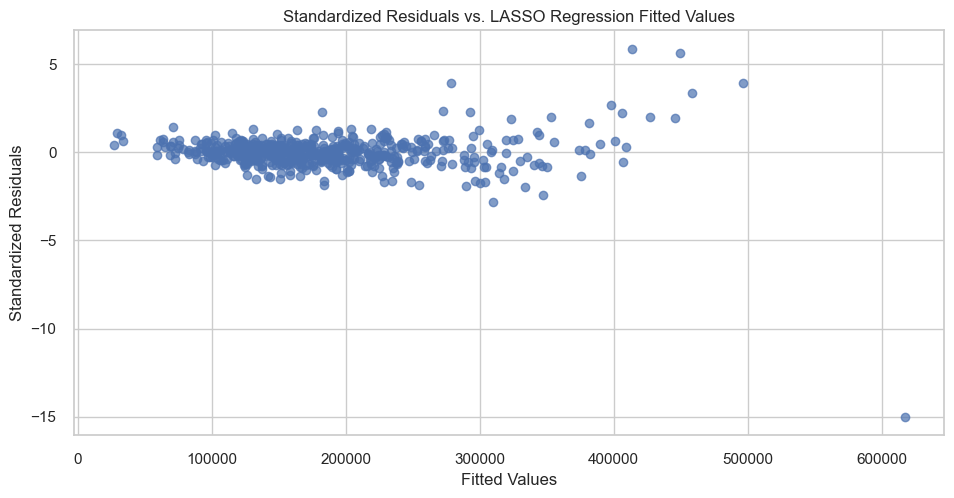

<Figure size 1000x500 with 0 Axes>

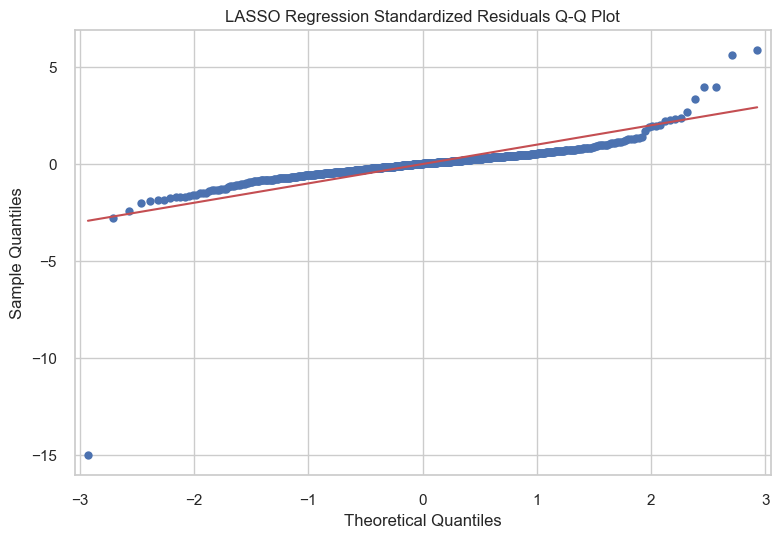

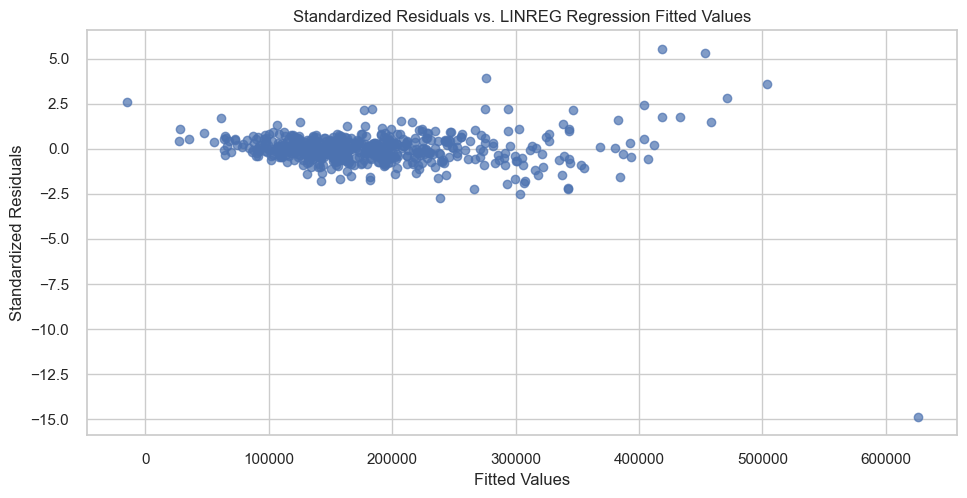

<Figure size 1000x500 with 0 Axes>

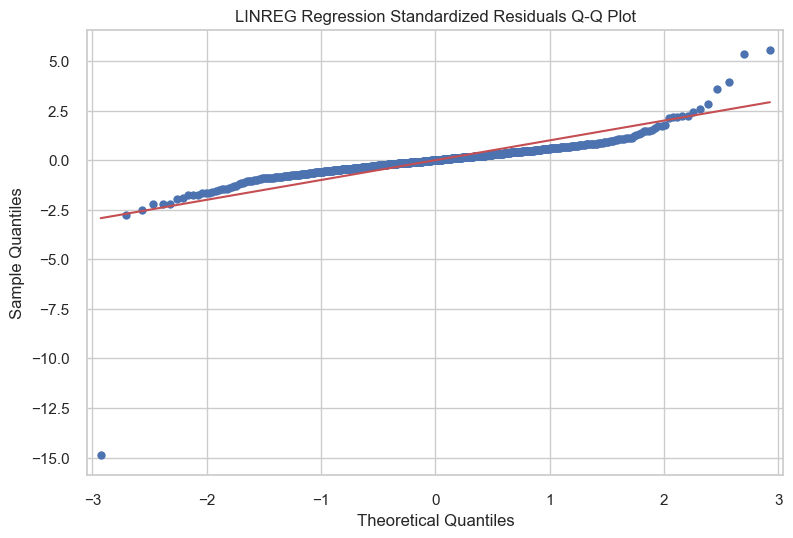

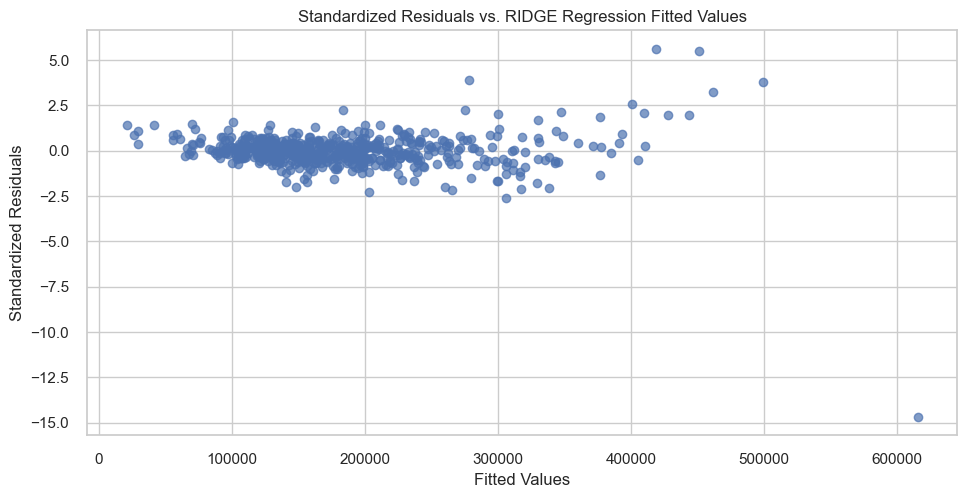

<Figure size 1000x500 with 0 Axes>

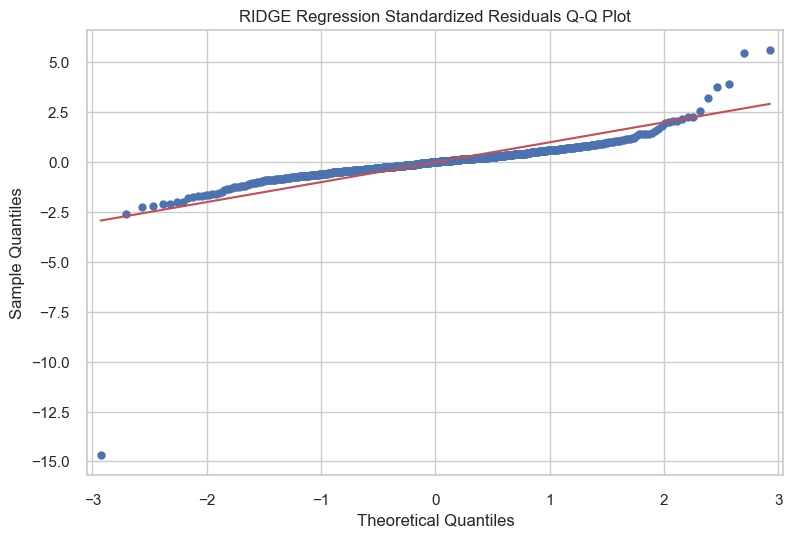

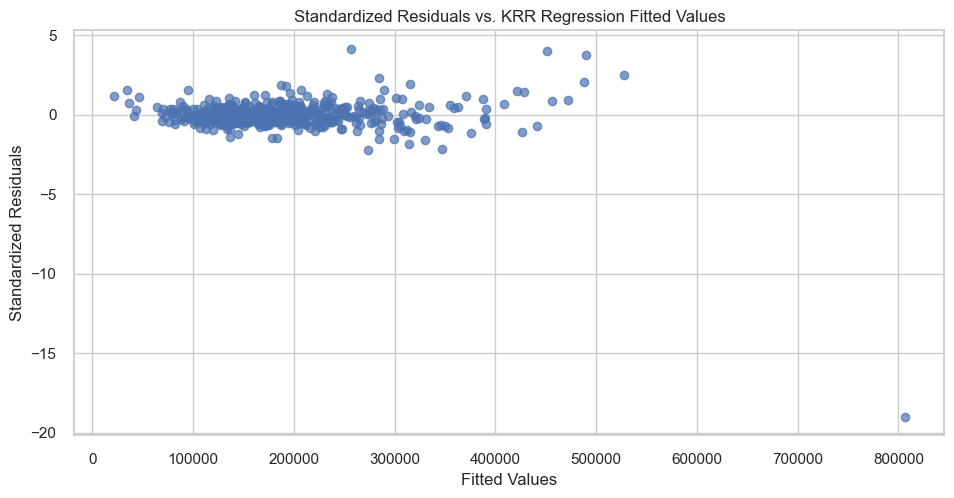

<Figure size 1000x500 with 0 Axes>

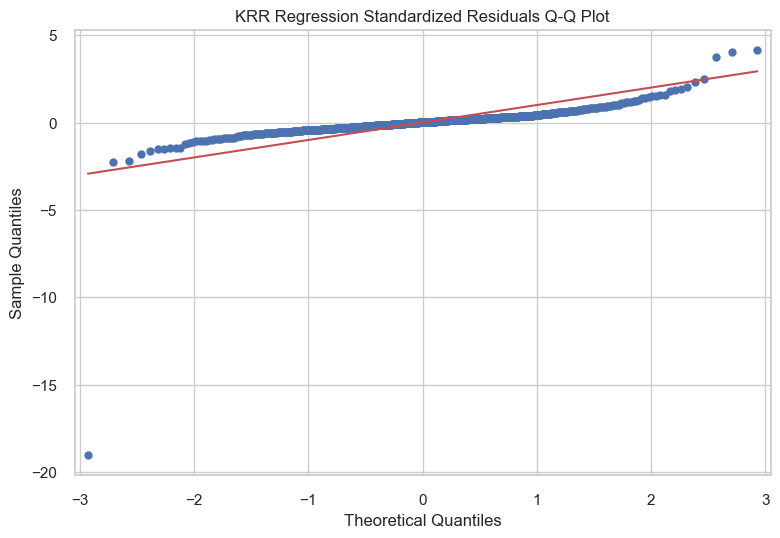

In [66]:
# Define a list of models (column names) for which you want to create residual plots
models = ['lasso', 'linreg', 'ridge', 'krr']

# Create residual plots for each model
for model in models:
    pred_col = f'{model}_pred'  # Predicted values column
    resid_col = f'{model}_resid'  # Residuals column

    # Calculate standardized residuals
    residuals = df_results[resid_col]
    standardized_residuals = (residuals - residuals.mean()) / residuals.std()

    # Scatter plot of standardized residuals vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(df_results[pred_col], standardized_residuals, alpha=0.7)
    plt.title(f'Standardized Residuals vs. {model.upper()} Regression Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Standardized Residuals')

    # Q-Q plot to check for normality of standardized residuals
    plt.figure(figsize=(10, 5))
    sm.qqplot(standardized_residuals, line='s', fit=True)
    plt.title(f'{model.upper()} Regression Standardized Residuals Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

plt.show()

From this plot, we can see that we have an extreme outlier at over -10 on the standardized residual plot. We are not going to remove it, but we need to see what it is. We would then ask more question about it to find out if it should stay in the data set or not. 

In [67]:
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
outlier_indices = standardized_residuals[standardized_residuals < -10].index
outlier_indices

Int64Index([508], dtype='int64')

So row 508 in the test set would need to be examined further at least. There are other outliers that we would need to look at based upon the sd residuals vs fitted plot, but 508 is the really extreme outlier. We also have some right tails in our QQ plots, but for the most part the residuals are fairly linear. 

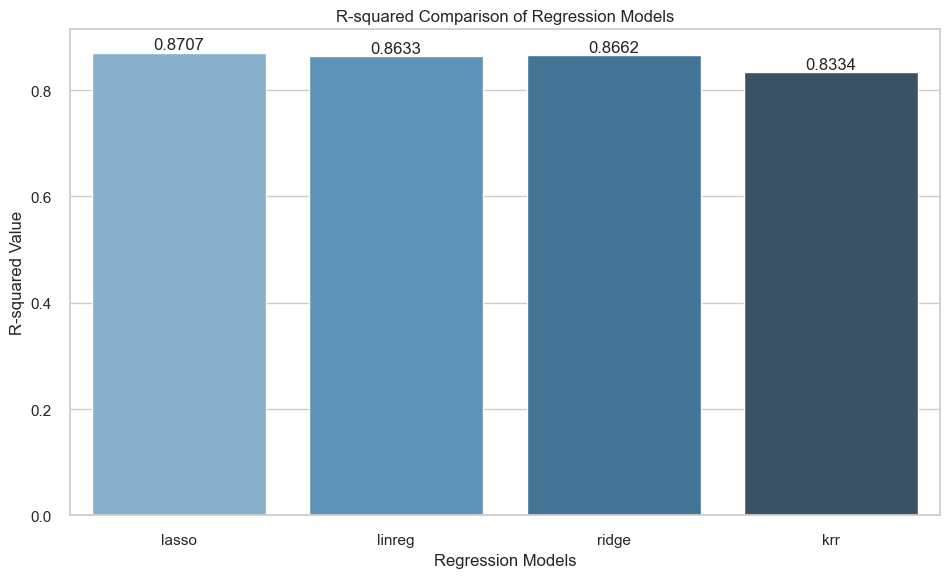

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of models and their corresponding R-squared values
models = ['lasso', 'linreg', 'ridge', 'krr']
r_squared_values = [r2_lasso, r2_linreg, r2_ridge, r2_krr]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r_squared_values, palette="Blues_d")
plt.title("R-squared Comparison of Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("R-squared Value")

# Annotate the bars with the R-squared values
for i, v in enumerate(r_squared_values):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

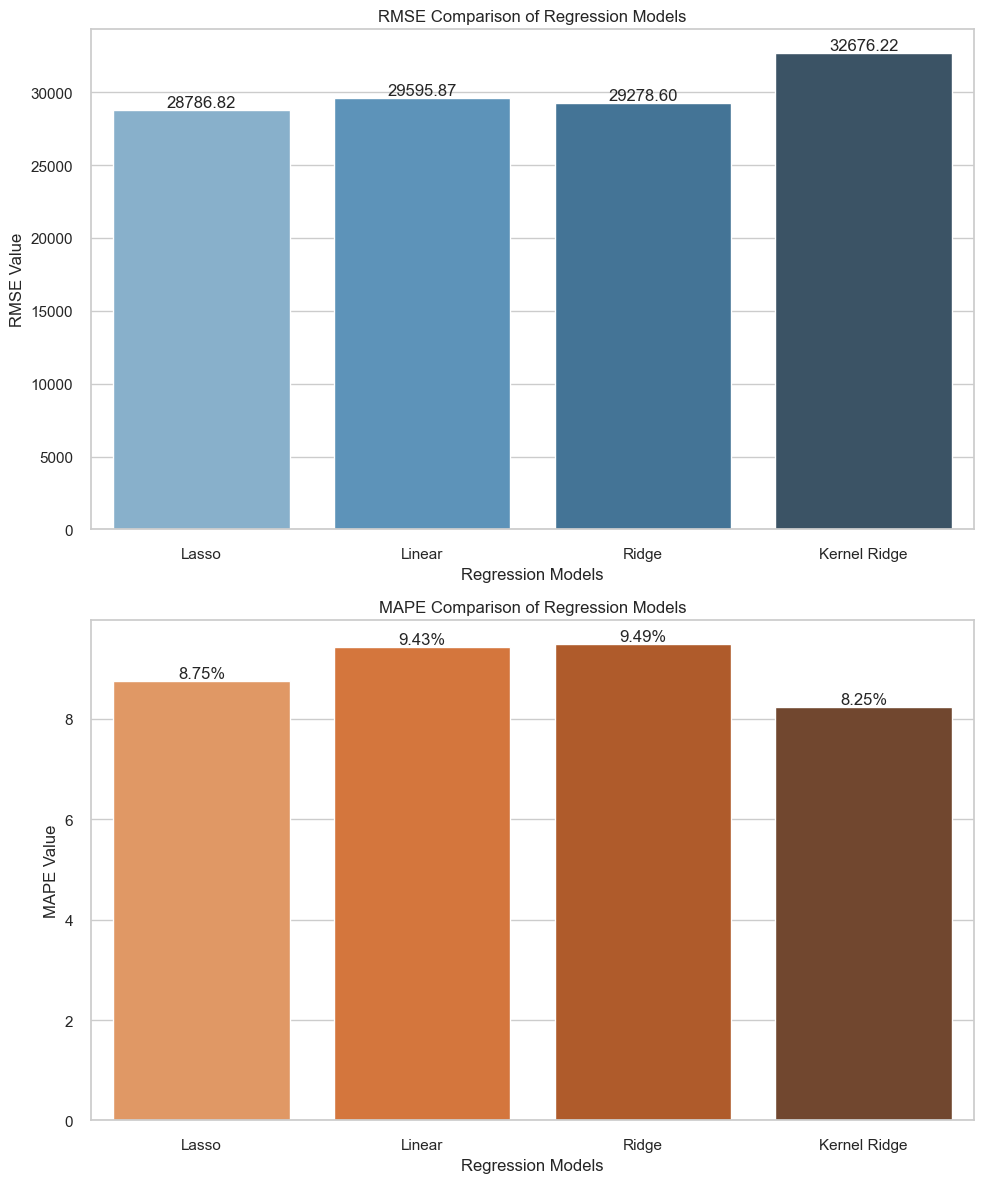

In [69]:
models = ['Lasso', 'Linear', 'Ridge', 'Kernel Ridge']
rmse_values = [rmse_lasso, rmse_linreg, rmse_ridge, rmse_krr]
mape_values = [mape_lasso, mape_linreg, mape_ridge, mape_krr]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot RMSE values
sns.barplot(x=models, y=rmse_values, palette="Blues_d", ax=axes[0])
axes[0].set_title("RMSE Comparison of Regression Models")
axes[0].set_ylabel("RMSE Value")
axes[0].set_xlabel("Regression Models")

# Annotate the bars with the RMSE values
for i, v in enumerate(rmse_values):
    axes[0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Plot MAPE values
sns.barplot(x=models, y=mape_values, palette="Oranges_d", ax=axes[1])
axes[1].set_title("MAPE Comparison of Regression Models")
axes[1].set_ylabel("MAPE Value")
axes[1].set_xlabel("Regression Models")

# Annotate the bars with the MAPE values
for i, v in enumerate(mape_values):
    axes[1].text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.show()

This is actually really interesting. From these graphs, we can see that ridge has the best R squared value at .8707 which means that the lasso model is explaining 87.07% of the variability in sales price. Lasso also had the lowest RMSE of 28786.82 which means that on average the lasso models predictions deviate from the actual values by 28,786.82 dollars. Here is what is interesting though, KRR which has been the highest on all the other metrics, has the lowest MAPE compared to all the other models. The KRR has a MAPE of 8.25 percent which means that on average the krr model predictions deviate from the actual vales by 8.25%. We did not know that is possible, but since more variablility is explained by the lasso model and the predictions are within $28786.82 of the actual price, we decided that the lasso model is the best model.